<a href="https://colab.research.google.com/github/Uday-Teja-nex/CodEvo-Solutions/blob/main/CodEvo_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/spam_ham_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df = df.drop('Unnamed: 0',axis=1)

In [ ]:
df = df.drop('label_num',axis=1)

In [ ]:
df.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

nltk.download('punkt')
nltk.download('stopwords')

# dataset
data = df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data['label'].value_counts()

,count
label,
ham,3672
spam,1499


In [ ]:
data.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [ ]:
!pip install nltk  # the Natural Language Toolkit (NLTK)

import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import nltk
print(nltk.data.path)


['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [ ]:
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale


In [ ]:
data = df
spam_classes_raw = data['label']
spam_messages = data['text']

In [ ]:
import nltk
import tensorflow as tf

#Custom tokenizer to remove stopwords and use lemmatization
def customtokenize(str):
    #Split string as tokens
    tokens=nltk.word_tokenize(str)
    #Filter for stopwords
    nostop = list(filter(lambda token: token not in stopwords.words('english'), tokens))
    #Perform lemmatization
    lemmatized=[lemmatizer.lemmatize(word) for word in nostop ]
    return lemmatized

from sklearn.feature_extraction.text import TfidfVectorizer

#Build a TF-IDF Vectorizer model
vectorizer = TfidfVectorizer(tokenizer=customtokenize)

#Transform feature input to TF-IDF
tfidf=vectorizer.fit_transform(spam_messages)
#Convert TF-IDF to numpy array
tfidf_array = tfidf.toarray()

#Build a label encoder for target variable to convert strings to numeric values.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
spam_classes = label_encoder.fit_transform(
                                spam_classes_raw)

#Convert target to one-hot encoding vector
spam_classes = tf.keras.utils.to_categorical(spam_classes,2)

print("TF-IDF Matrix Shape : ", tfidf.shape)
print("One-hot Encoding Shape : ", spam_classes.shape)

X_train,X_test,Y_train,Y_test = train_test_split( tfidf_array, spam_classes, test_size=0.10)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF Matrix Shape :  (5171, 47969)
One-hot Encoding Shape :  (5171, 2)


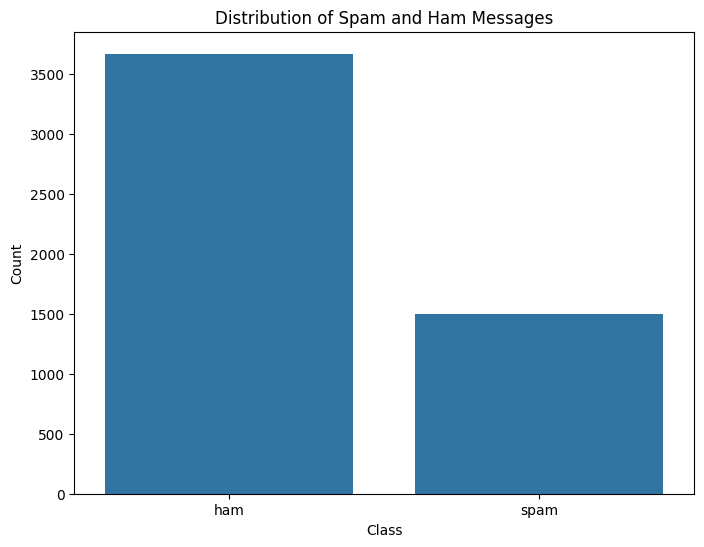

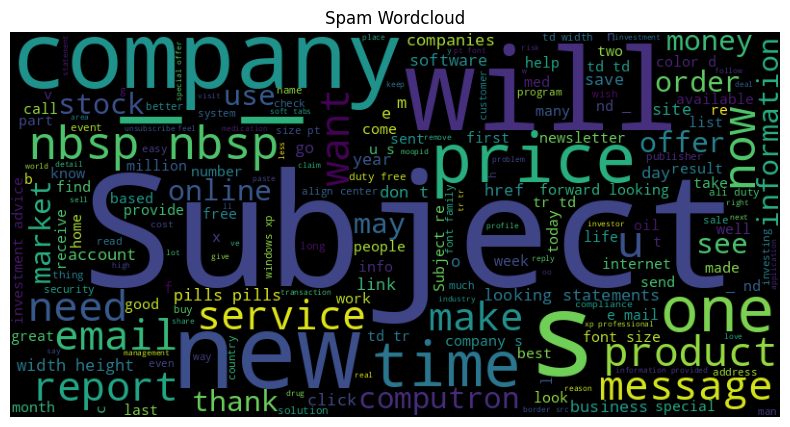

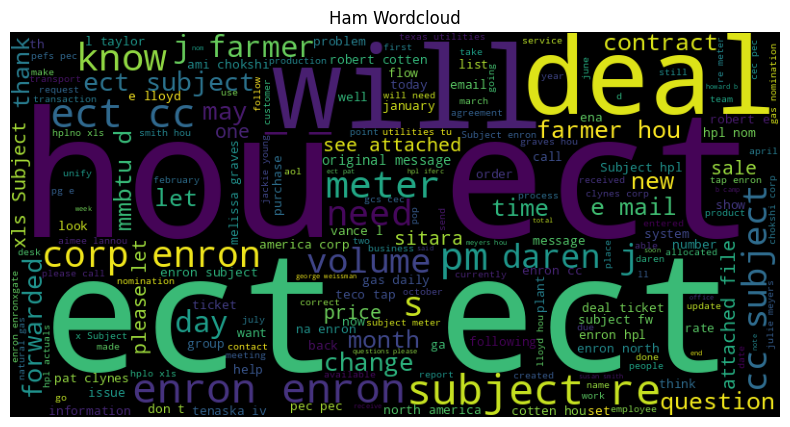

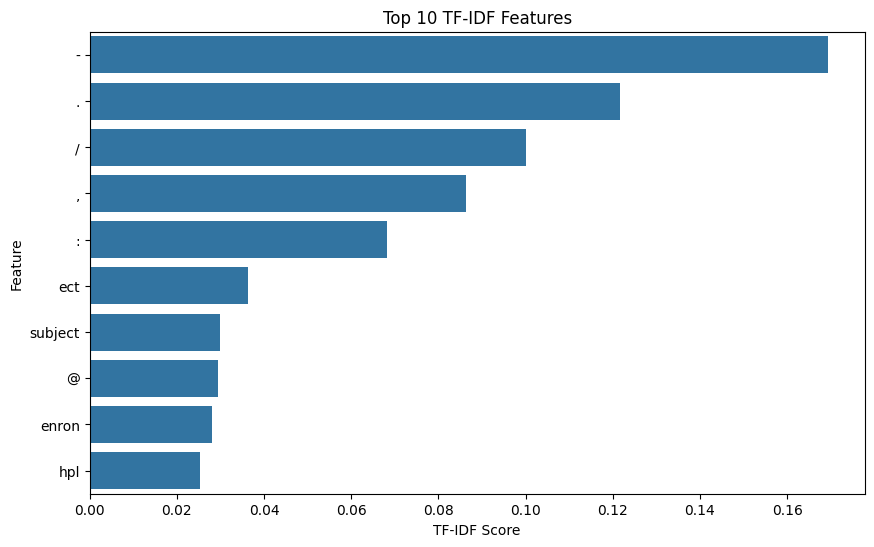

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Wordcloud for spam messages
spam_words = ' '.join(list(df[df['label'] == 'spam']['text']))
spam_wordcloud = WordCloud(width=800, height=400).generate(spam_words)

plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.title('Spam Wordcloud')
plt.show()

# Wordcloud for ham messages
ham_words = ' '.join(list(df[df['label'] == 'ham']['text']))
ham_wordcloud = WordCloud(width=800, height=400).generate(ham_words)

plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.title('Ham Wordcloud')
plt.show()


# Example of visualizing TF-IDF feature importance (top 10)
feature_names = vectorizer.get_feature_names_out()
top_features_indices = np.argsort(tfidf_array.mean(axis=0))[::-1][:10]
top_features = [feature_names[i] for i in top_features_indices]
top_tfidf_scores = tfidf_array.mean(axis=0)[top_features_indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_tfidf_scores, y=top_features)
plt.title('Top 10 TF-IDF Features')
plt.xlabel('TF-IDF Score')
plt.ylabel('Feature')
plt.show()

Building and Evaluating the Model

In [ ]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

#Hyper Parameters for building the model
NB_CLASSES=2
N_HIDDEN=32

model = tf.keras.models.Sequential()

model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(X_train.shape[1],),
                              name='Hidden-Layer-1',
                              activation='relu'))

model.add(keras.layers.Dense(N_HIDDEN,
                              name='Hidden-Layer-2',
                              activation='relu'))

model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)               │ (None, 32)                  │       1,535,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden-Layer-2 (Dense)               │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output-Layer (Dense)                 │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,536,162 (5.86 MB)

 Trainable params: 1,536,162 (5.86 MB)

 Non-trainable params: 0 (0.00 B)


Training Progress:
------------------------------------
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - accuracy: 0.5939 - loss: 0.6825 - val_accuracy: 0.7132 - val_loss: 0.6422
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 276ms/step - accuracy: 0.7108 - loss: 0.6262 - val_accuracy: 0.7390 - val_loss: 0.5748
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - accuracy: 0.7806 - loss: 0.5508 - val_accuracy: 0.8582 - val_loss: 0.4955
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 0.9111 - loss: 0.4689 - val_accuracy: 0.8958 - val_loss: 0.4186
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.9573 - loss: 0.3845 - val_accuracy: 0.9345 - val_loss: 0.3485
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.9796 - loss: 0.3116 - val_accuracy: 0.9581 - val_loss: 0.2891
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 239ms/step - accuracy: 0.9890 - loss: 0.2470 - val_accuracy: 0.9689 - val_loss: 0.2400
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step - accuracy:

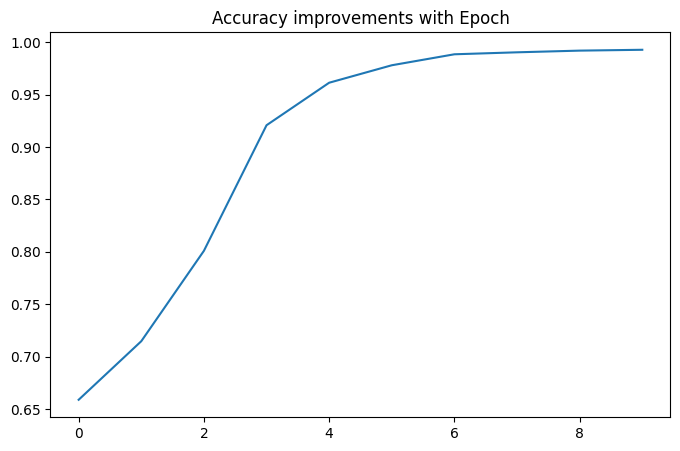


Evaluation against Test Dataset :
------------------------------------
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9818 - loss: 0.1413


[0.13861332833766937, 0.9806950092315674]

In [ ]:
#verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training
BATCH_SIZE=512
EPOCHS=10
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


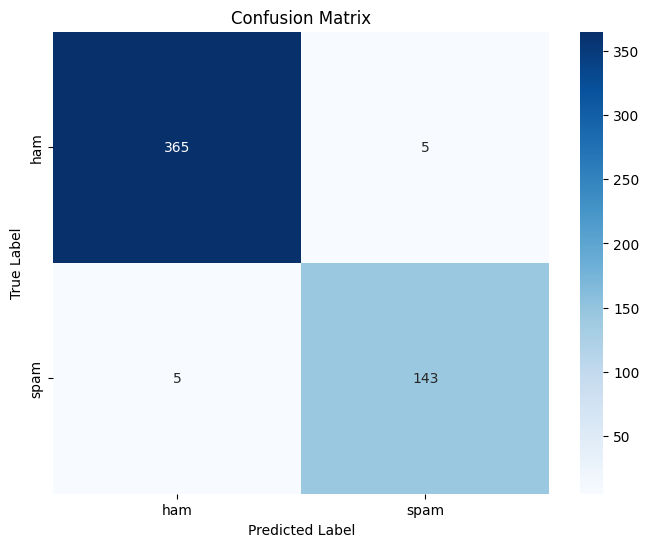

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the classes for the test set
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Predicting

#Convert input into IF-IDF vector using the same vectorizer model
predict_tfidf=vectorizer.transform(["Click here to win and recieve GOLD for free!",
                                    "We are pleased to confirm that this entry was successfully processed. However, if the entry is not reflected in the M&Q next version list, please notify us as soon as possible after it is released."]).toarray()

print(predict_tfidf.shape)

#Predict using model
prediction=np.argmax( model.predict(predict_tfidf), axis=1 )
print("Prediction Output:" , prediction)

#Print prediction classes
print("Prediction Classes are ", label_encoder.inverse_transform(prediction))

(2, 47969)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction Output: [1 0]
Prediction Classes are  ['spam' 'ham']
